# Plotting Simple noise analysis

Load PSD, PGV, PGA and PMS per day as a numpy array.

Create some simple plots.

In [4]:
import numpy as np
import pandas as pd
import obspy
from obspy import UTCDateTime
import datetime
import scipy
import glob
import sys
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib

# sys.path.append("/data/wsd01/pnwstore/")
# from pnwstore.mseed import WaveformClient
# client = WaveformClient()

sys.path.append('/home/koepflma/project1/Mt-St-Helens')
from functions import *

In [11]:
save_path = 'first_test/{}/{}'.format(year,sta) # path where to save file
save_filename = '{}_{}_{}'.format(year, jday, sta) # file name

if not os.path.exists(save_path): # create folders from save_path if not exists
    os.makedirs(save_path)

## Load npy

In [38]:
days = range(1,2)
years = [2018]
sta = 'EDM'

merged_list = [(year, day) for year in years for day in days]

t_list = [] # list with dates
Pxx_list = []
rms_list = []
rmes_list = []
pgv_list = []
pga_list = []

for year,day in merged_list:
    
    try: # check if the date exists
        date = UTCDateTime(year=year, julday=day)
        
    except(ValueError):
        print('Date does not exist: {}-{}'.format(year, day))
        continue # if date not exist, go to next itteration
        
    t_list.append(date)
    
    try:
        day_ar = np.load('first_test/{}/{}/{}_{}_{}.npy'.format(year,sta,year,day,sta), allow_pickle=True)
        Pxx_list.append(day_ar[1])
        rms_list.append(day_ar[3])
        rmes_list.append(day_ar[4])
        pgv_list.append(day_ar[5])
        pga_list.append(day_ar[6])
        
    except (FileNotFoundError): # if the file does not exist
        print('File does not exist: {}-{}'.format(year, day))
        Pxx_list.append(np.nan)
        rms_list.append(np.nan)
        rmes_list.append(np.nan)
        pgv_list.append(np.nan)
        pga_list.append(np.nan)
        
print(len(t_list), len(Pxx_list))

# convert lists into arrays
Pxx_ar = np.array(Pxx_list)
rms_ar = np.array(rms_list)
rmes_ar = np.array(rmes_list)
pgv_ar = np.array(pgv_list)
pga_ar = np.array(pga_list)
                  
start_t_list = day_ar[2]
freq = day_ar[0]

1 1


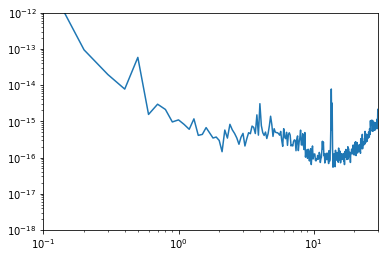

In [87]:
# interpolated 2**19 day instrument response removed
fig, ax = plt.subplots()
ax.plot(freqs_out, Pxx_res)
ax.set_xlim(1e-1,3e1)
ax.set_ylim(1e-18,1e-12)
ax.set_xscale('log')
ax.set_yscale('log')

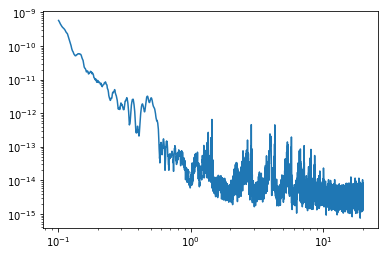

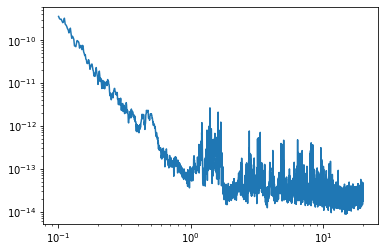

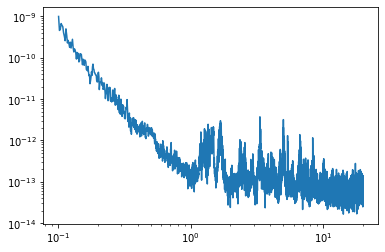

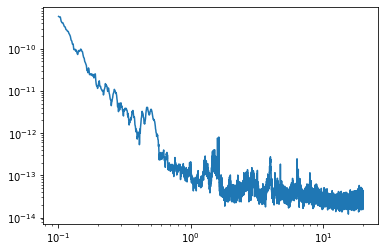

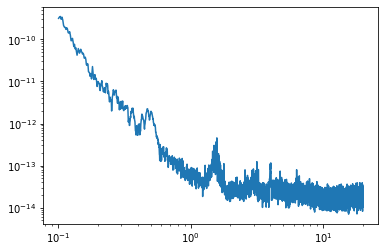

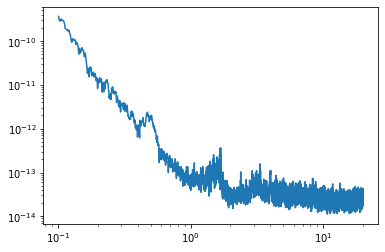

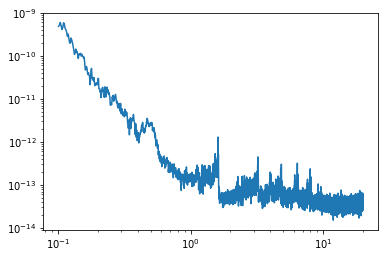

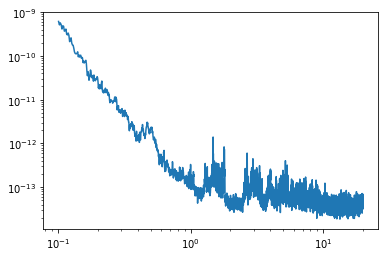

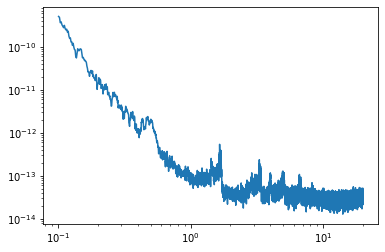

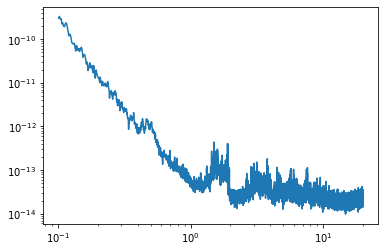

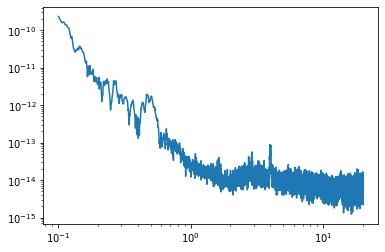

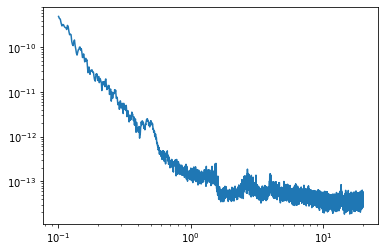

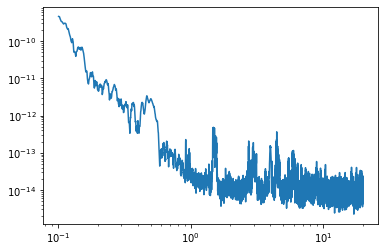

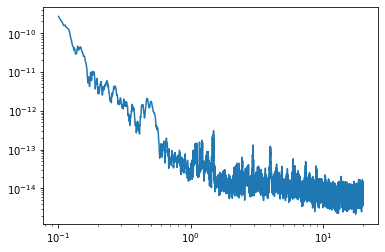

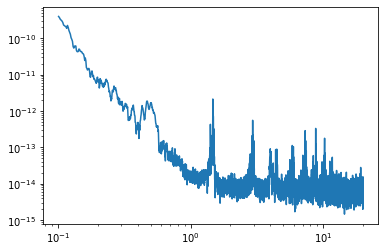

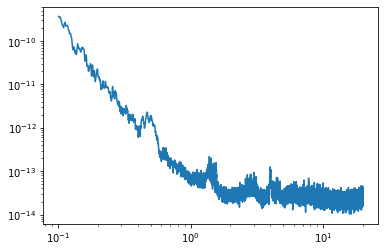

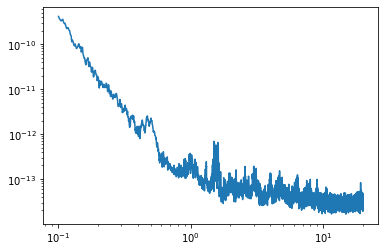

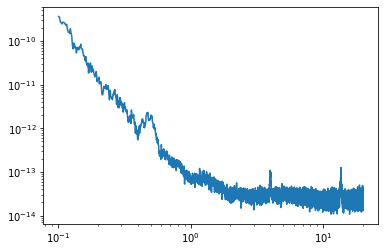

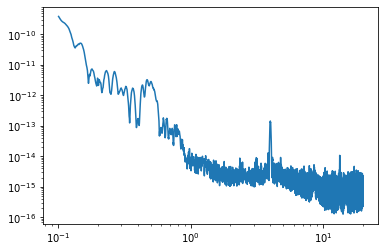

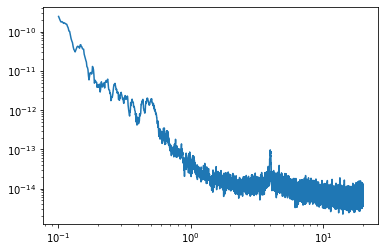

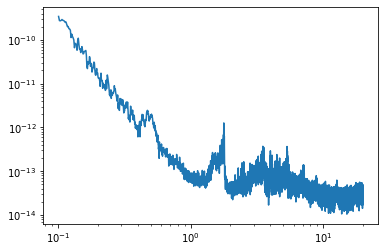

In [32]:
# instrument response removed
for i in range(len(Pxx_ar)):
    fig, ax = plt.subplots()
    ax.plot(freq, Pxx_ar[i])
#     ax.set_xlim(1e-1,3e1)
#     ax.set_ylim(1e-18,1e-11)
    ax.set_xscale('log')
    ax.set_yscale('log')
    fig.show()

In [33]:
times, frequencies = np.meshgrid(t_list, freq, sparse=False)
print(times.shape,frequencies.shape)
times # [[t1,t2,...],[t1,t2,...]]
frequencies # [[f1,f1,...],[f2,f2,...]]

(13042, 21) (13042, 21)


array([[ 0.10070801,  0.10070801,  0.10070801, ...,  0.10070801,
         0.10070801,  0.10070801],
       [ 0.10223389,  0.10223389,  0.10223389, ...,  0.10223389,
         0.10223389,  0.10223389],
       [ 0.10375977,  0.10375977,  0.10375977, ...,  0.10375977,
         0.10375977,  0.10375977],
       ...,
       [19.99664307, 19.99664307, 19.99664307, ..., 19.99664307,
        19.99664307, 19.99664307],
       [19.99816895, 19.99816895, 19.99816895, ..., 19.99816895,
        19.99816895, 19.99816895],
       [19.99969482, 19.99969482, 19.99969482, ..., 19.99969482,
        19.99969482, 19.99969482]])

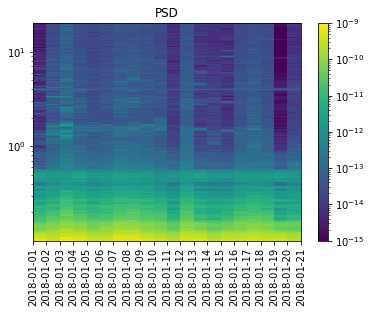

In [34]:
fig, ax = plt.subplots()
#plt.imshow(np.log10(Pxx_ar[:,300:10000]), aspect='auto')
# pmc = plt.pcolormesh(times, frequencies, np.log10(np.transpose(Pxx_ar)), vmin=-15, vmax=-9.5,
#                     norm=colors.LogNorm(vmin,vmax))

vmin = 1e-15
vmax = 1e-9
pmc = plt.pcolormesh(times, frequencies, np.transpose(Pxx_ar), vmin=vmin, vmax=vmax,
                    norm=colors.LogNorm(vmin,vmax))
ax.set_yscale('log')
# ax.set_xticks(range(0,len(freq),1000))
# ax.set_xticklabels([freq[ff] for ff in range(0,len(freq),1000)])

ax.set_xticks(range(int(ax.get_xlim()[0]),int(ax.get_xlim()[1]),int(60*60*24-1)))
ax.set_xticklabels([day_d.date for day_d in t_list], rotation = 90)
# ax.set_xticklabels(datetime.datetime.fromtimestamp(ax.get_xlim()*1e-9).strftime('%Y-%m-%d'))

ax.set_title('PSD')
plt.colorbar(pmc)
plt.show()

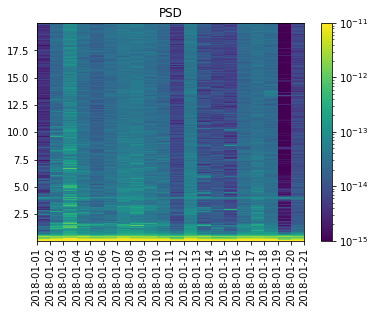

In [19]:
fig, ax = plt.subplots()
#plt.imshow(np.log10(Pxx_ar[:,300:10000]), aspect='auto')
# pmc = plt.pcolormesh(times, frequencies, np.log10(np.transpose(Pxx_ar)), vmin=-15, vmax=-9.5,
#                     norm=colors.LogNorm(vmin,vmax))
vmin = 1e-15
vmax = 1e-11
pmc = plt.pcolormesh(times, frequencies, np.transpose(Pxx_ar), vmin=vmin, vmax=vmax,
                    norm=colors.LogNorm(vmin,vmax))

#ax.set_yscale('log')
ax.set_xticks(range(int(ax.get_xlim()[0]),int(ax.get_xlim()[1]),int(60*60*24-1)))
ax.set_xticklabels([day_d.date for day_d in t_list], rotation = 90)
# ax.set_xticklabels(datetime.datetime.fromtimestamp(ax.get_xlim()*1e-9).strftime('%Y-%m-%d'))

ax.set_title('PSD')

plt.colorbar(pmc)
plt.show()

In [ ]:
mittelwert von jedem zeitfenster uber alle tage mit nachbarn vergleichen

In [ ]:
fig, ax = plt.subplots()
plt.imshow(np.log10(Pxx_ar[:,100:1000]), aspect='auto')
#ax.set_xscale('log')
# ax.set_xticks(range(0,len(freq),1000))
# ax.set_xticklabels([freq[ff] for ff in range(0,len(freq),1000)])

ax.set_yticks(range(0,len(t_list)))
ax.set_yticklabels([day_d.date for day_d in t_list])
#pmc = colors.LogNorm(vmin=Pxx_ar[:,:100].min(), vmax=Pxx_ar[:,:100].max())
plt.colorbar()
plt.show()

In [324]:
len(range(int(ax.get_xlim()[0]),int(ax.get_xlim()[1]),int(60*60*24-1)))

21

In [281]:
t_datetime, t_day = np.meshgrid(t_list, start_t_list, sparse=False)
print(t_datetime.shape,t_day.shape)
t_datetime # [[t1,t2,...],[t1,t2,...]]
t_day # [[f1,f1,...],[f2,f2,...]]

(131, 21) (131, 21)


array([[UTCDateTime(2018, 1, 21, 0, 0), UTCDateTime(2018, 1, 21, 0, 0),
        UTCDateTime(2018, 1, 21, 0, 0), ...,
        UTCDateTime(2018, 1, 21, 0, 0), UTCDateTime(2018, 1, 21, 0, 0),
        UTCDateTime(2018, 1, 21, 0, 0)],
       [UTCDateTime(2018, 1, 21, 0, 10, 55, 360000),
        UTCDateTime(2018, 1, 21, 0, 10, 55, 360000),
        UTCDateTime(2018, 1, 21, 0, 10, 55, 360000), ...,
        UTCDateTime(2018, 1, 21, 0, 10, 55, 360000),
        UTCDateTime(2018, 1, 21, 0, 10, 55, 360000),
        UTCDateTime(2018, 1, 21, 0, 10, 55, 360000)],
       [UTCDateTime(2018, 1, 21, 0, 21, 50, 720000),
        UTCDateTime(2018, 1, 21, 0, 21, 50, 720000),
        UTCDateTime(2018, 1, 21, 0, 21, 50, 720000), ...,
        UTCDateTime(2018, 1, 21, 0, 21, 50, 720000),
        UTCDateTime(2018, 1, 21, 0, 21, 50, 720000),
        UTCDateTime(2018, 1, 21, 0, 21, 50, 720000)],
       ...,
       [UTCDateTime(2018, 1, 21, 23, 18, 6, 80000),
        UTCDateTime(2018, 1, 21, 23, 18, 6, 80000),
      

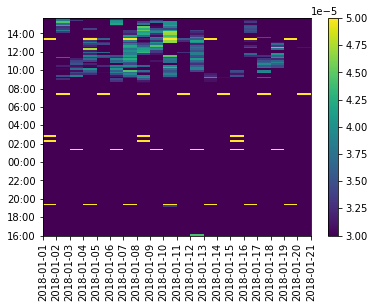

In [359]:
# local time
fig, ax = plt.subplots()
pmc = plt.pcolormesh(t_datetime, t_day, np.transpose(rms_ar), vmin=5e-5, vmax=3e-5)

ax.set_xticks(range(int(ax.get_xlim()[0]),int(ax.get_xlim()[1]),int(60*60*24-1)))
ax.set_xticklabels([day_d.strftime("%Y-%m-%d") for day_d in t_list], rotation = 90)
#ax.set_xticklabels([day_d.strftime("%Y-%m-%d") for day_d in t_list], rotation = 90) # date
nanos = range(int(ax.get_ylim()[0]),int(ax.get_ylim()[1]),int(2*60*60))
ax.set_yticks(nanos)
ax.set_yticklabels([datetime.datetime.fromtimestamp(nn).strftime("%H:%M") for nn in nanos]) # time
# ax.set_yticklabels([tt.strftime("%H:%M:%S") for tt in start_t_list]) # time

plt.colorbar(pmc)
plt.show()

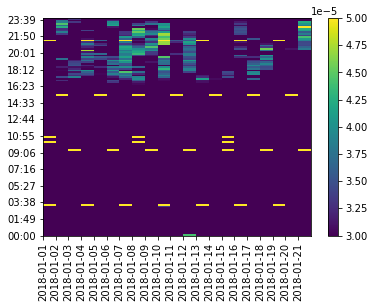

In [394]:
fig, ax = plt.subplots()
pmc = plt.pcolormesh(np.transpose(rms_ar), vmin=5e-5, vmax=3e-5)

ax.set_xticks(range(0,len(t_list),1))
ax.set_xticklabels([day_d.strftime("%Y-%m-%d") for day_d in t_list], rotation = 90)

dtimes = range(0,len(start_t_list),10)
ax.set_yticks(dtimes)
ax.set_yticklabels([start_t_list[tt].strftime("%H:%M") for tt in dtimes]) # time

plt.colorbar(pmc)
plt.show()

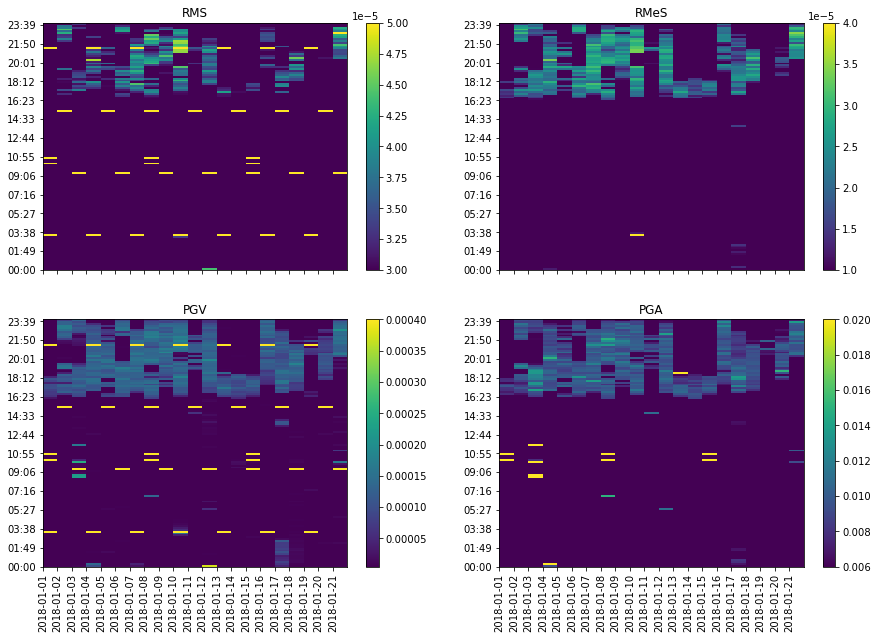

In [5]:
# original
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 10), sharex=True)
titles = ['RMS', 'RMeS', 'PGV', 'PGA']
vmins = [5e-5, 1e-5, 5e-6, 6e-3]
vmaxs = [3e-5, 4e-5, 4e-4, 2e-2]

for ax, matrix, title, vmin, vmax in zip((ax1,ax2,ax3,ax4),(rms_ar,rmes_ar,pgv_ar,pga_ar), titles, vmins, vmaxs):
    pcm = ax.pcolormesh(np.transpose(matrix), vmin=vmin, vmax=vmax)
    ax.set_title('{}'.format(title))
    ax.set_xticks(range(0,len(t_list),1))
    ax.set_xticklabels([day_d.strftime("%Y-%m-%d") for day_d in t_list], rotation = 90)

    dtimes = range(0,len(start_t_list),10)
    ax.set_yticks(dtimes)
    ax.set_yticklabels([start_t_list[tt].strftime("%H:%M") for tt in dtimes]) # time
    
    dtimes = range(0,len(start_t_list),10)
    ax.set_yticks(dtimes)
    ax.set_yticklabels([start_t_list[tt].strftime("%H:%M") for tt in dtimes]) # time

    fig.colorbar(pcm, ax=ax)
#plt.show()

# NOT USED

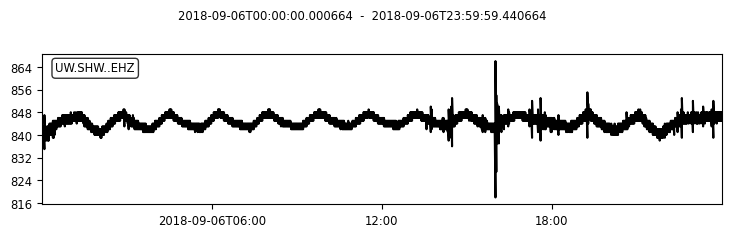

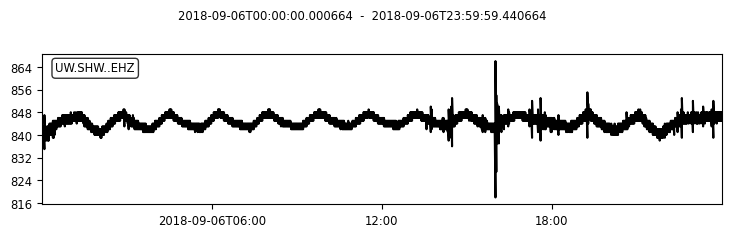

In [59]:
net = 'UW'
sta = 'SHW'
cha = 'EHZ'
jday = 249
year = 2018
st_long = obspy.Stream()
st_r = read_stream(net, sta, cha, year, jday)
st_r

st_r.slice(st_r[0].stats.starttime)

st_r.plot()

In [62]:
net = 'UW'
sta = 'EDM'
cha = 'EHZ'
jday = 1
year = 2018
st_long = obspy.Stream()
st_r = read_stream(net, sta, cha, year, jday)
st_r

st_r.slice(st_r[0].stats.starttime)

1 Trace(s) in Stream:
UW.EDM..EHZ | 2018-01-01T00:00:00.000416Z - 2018-01-01T23:59:59.440416Z | 100.0 Hz, 8639945 samples

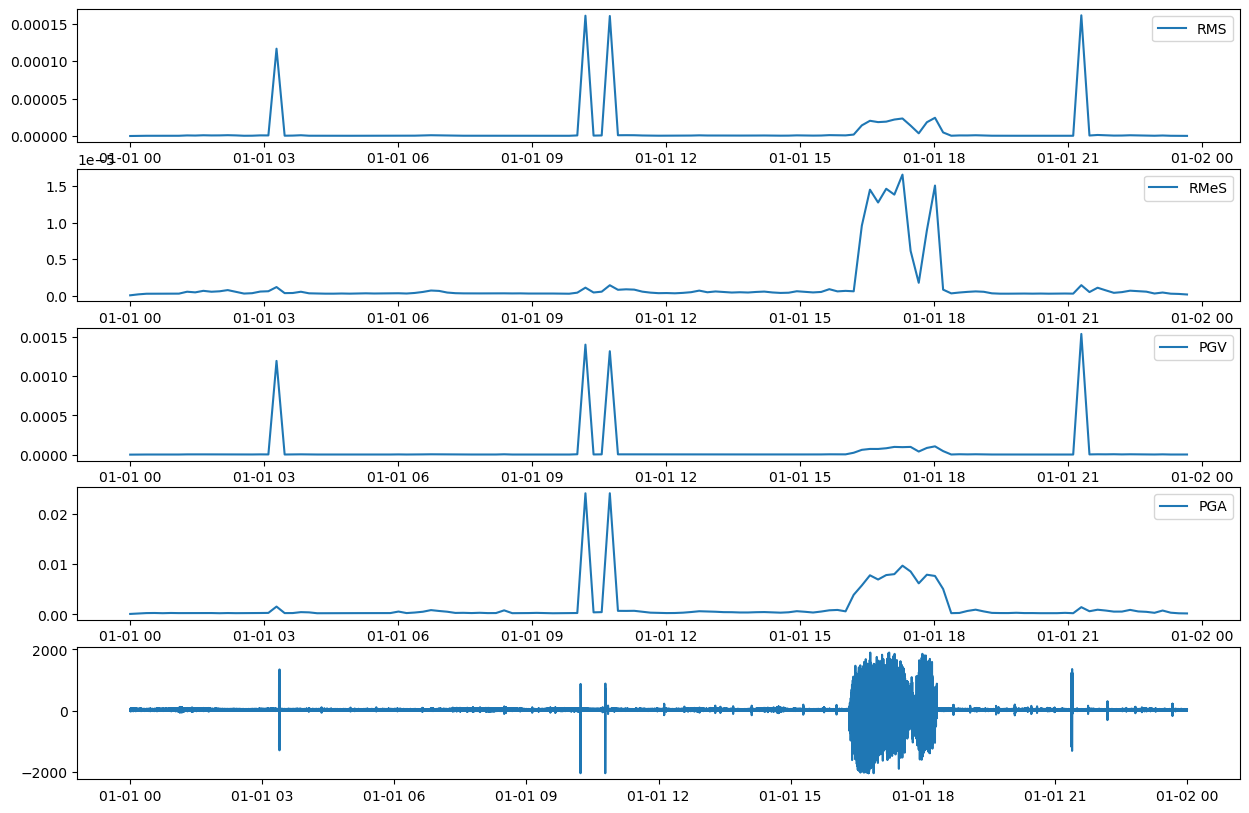

In [78]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(15, 10))
ax1.plot([i.datetime for i in day_ar[2]], day_ar[3], label='RMS')
ax2.plot([i.datetime for i in day_ar[2]], day_ar[4], label='RMeS')
ax3.plot([i.datetime for i in day_ar[2]], day_ar[5], label='PGV')
ax4.plot([i.datetime for i in day_ar[2]], day_ar[6], label='PGA')
for i, tr in enumerate(st_r):
    ax5.plot(st_r[i].times('matplotlib'), st_r[i].data, "C{}".format(i))
    ax5.xaxis_date()

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

## working with pd

In [86]:
days = range(1,4)
years = [2018]
sta = 'EDM'

merged_list = [(year, day) for year in years for day in days]

t_list = [] # list with dates
Pxx_list = []
rms_list = []
rmes_list = []
pgv_list = []
pga_list = []

df = pd.DataFrame()

for year,day in merged_list:
    
    try:
        day_ar = np.load('first_test/{}/{}/{}_{}_{}.npy'.format(year,sta,year,day,sta), allow_pickle=True)
        
        Pxx_list.append(day_ar[1])
        
        t_list.append([t_w for t_w in day_ar[2]])
        rms_list.append([rms for rms in day_ar[3]])
        rmes_list.append(day_ar[4])
        pgv_list.append(day_ar[5])
        pga_list.append(day_ar[6])
        
        
    except (FileNotFoundError): # if the file does not exist
        print('File does not exist: {}-{}'.format(year, day))
        
        Pxx_list.append(np.nan)
        
        date_times = [datetime.datetime.combine(UTCDateTime(year=year, julday=day).date, t_w.time) 
                      for t_w in day_ar[2]]
        t_list.append(date_times)
        rms_list.append(np.nan)
        rmes_list.append(np.nan)
        pgv_list.append(np.nan)
        pga_list.append(np.nan)
        
    # lists to DataFrame

df['UTC'] = t_list[0]
df['RMS'] = rms_list[0]
                  
freq = day_ar[0]

In [87]:
df

,UTC,RMS
0,2018-01-01T00:00:00.000000Z,1.028882e-07
1,2018-01-01T00:10:55.360000Z,2.731302e-07
2,2018-01-01T00:21:50.720000Z,3.978603e-07
3,2018-01-01T00:32:46.080000Z,3.967407e-07
4,2018-01-01T00:43:41.440000Z,4.191699e-07
...,...,...
126,2018-01-01T22:56:15.360000Z,4.495009e-07
127,2018-01-01T23:07:10.720000Z,7.752433e-07
128,2018-01-01T23:18:06.080000Z,4.060968e-07
129,2018-01-01T23:29:01.440000Z,3.562269e-07


In [85]:
t_list[2]

array([UTCDateTime(2018, 1, 3, 0, 0),
       UTCDateTime(2018, 1, 3, 0, 10, 55, 360000),
       UTCDateTime(2018, 1, 3, 0, 21, 50, 720000),
       UTCDateTime(2018, 1, 3, 0, 32, 46, 80000),
       UTCDateTime(2018, 1, 3, 0, 43, 41, 440000),
       UTCDateTime(2018, 1, 3, 0, 54, 36, 800000),
       UTCDateTime(2018, 1, 3, 1, 5, 32, 160000),
       UTCDateTime(2018, 1, 3, 1, 16, 27, 520000),
       UTCDateTime(2018, 1, 3, 1, 27, 22, 880000),
       UTCDateTime(2018, 1, 3, 1, 38, 18, 240000),
       UTCDateTime(2018, 1, 3, 1, 49, 13, 600000),
       UTCDateTime(2018, 1, 3, 2, 0, 8, 960000),
       UTCDateTime(2018, 1, 3, 2, 11, 4, 320000),
       UTCDateTime(2018, 1, 3, 2, 21, 59, 680000),
       UTCDateTime(2018, 1, 3, 2, 32, 55, 40000),
       UTCDateTime(2018, 1, 3, 2, 43, 50, 400000),
       UTCDateTime(2018, 1, 3, 2, 54, 45, 760000),
       UTCDateTime(2018, 1, 3, 3, 5, 41, 120000),
       UTCDateTime(2018, 1, 3, 3, 16, 36, 480000),
       UTCDateTime(2018, 1, 3, 3, 27, 31, 840000),


In [45]:
[datetime.datetime.combine(UTCDateTime(year=year, julday=day).date, t_w.time) for t_w in day_ar[2]]

[datetime.datetime(2018, 1, 21, 0, 0),
 datetime.datetime(2018, 1, 21, 0, 10, 55, 360000),
 datetime.datetime(2018, 1, 21, 0, 21, 50, 720000),
 datetime.datetime(2018, 1, 21, 0, 32, 46, 80000),
 datetime.datetime(2018, 1, 21, 0, 43, 41, 440000),
 datetime.datetime(2018, 1, 21, 0, 54, 36, 800000),
 datetime.datetime(2018, 1, 21, 1, 5, 32, 160000),
 datetime.datetime(2018, 1, 21, 1, 16, 27, 520000),
 datetime.datetime(2018, 1, 21, 1, 27, 22, 880000),
 datetime.datetime(2018, 1, 21, 1, 38, 18, 240000),
 datetime.datetime(2018, 1, 21, 1, 49, 13, 600000),
 datetime.datetime(2018, 1, 21, 2, 0, 8, 960000),
 datetime.datetime(2018, 1, 21, 2, 11, 4, 320000),
 datetime.datetime(2018, 1, 21, 2, 21, 59, 680000),
 datetime.datetime(2018, 1, 21, 2, 32, 55, 40000),
 datetime.datetime(2018, 1, 21, 2, 43, 50, 400000),
 datetime.datetime(2018, 1, 21, 2, 54, 45, 760000),
 datetime.datetime(2018, 1, 21, 3, 5, 41, 120000),
 datetime.datetime(2018, 1, 21, 3, 16, 36, 480000),
 datetime.datetime(2018, 1, 21, 

In [41]:
datetime.datetime.combine(UTCDateTime(year=year, julday=day).date, [t_w.time for t_w in day_ar[2]])

TypeError: combine() argument 2 must be datetime.time, not list

In [5]:
UTCDateTime(year=2004, julday=366, hour=7)

2004-12-31T07:00:00.000000Z

In [11]:
net = 'UW'
sta = 'EDM'
cha = 'EHZ'
year = 2004

st_long = obspy.Stream()
for jday in range(247,248):
    st_r = read_stream(net, sta, cha, year, jday)
    st_long += st_r
st_long

12 Trace(s) in Stream:
UW.EDM..EHZ | 2004-09-03T00:00:00.009900Z - 2004-09-03T14:06:29.979900Z | 100.0 Hz, 5078998 samples
UW.EDM..EHZ | 2004-09-03T14:06:30.000900Z - 2004-09-03T15:56:30.000900Z | 100.0 Hz, 660001 samples
UW.EDM..EHZ | 2004-09-03T15:56:30.020900Z - 2004-09-03T16:51:40.010900Z | 100.0 Hz, 331000 samples
UW.EDM..EHZ | 2004-09-03T16:51:40.030900Z - 2004-09-03T17:45:10.020900Z | 100.0 Hz, 321000 samples
UW.EDM..EHZ | 2004-09-03T17:45:10.041000Z - 2004-09-03T18:38:40.031000Z | 100.0 Hz, 321000 samples
UW.EDM..EHZ | 2004-09-03T18:38:40.051000Z - 2004-09-03T19:32:30.041000Z | 100.0 Hz, 323000 samples
UW.EDM..EHZ | 2004-09-03T19:32:30.060900Z - 2004-09-03T20:26:20.050900Z | 100.0 Hz, 323000 samples
UW.EDM..EHZ | 2004-09-03T20:26:20.070900Z - 2004-09-03T21:20:30.060900Z | 100.0 Hz, 325000 samples
UW.EDM..EHZ | 2004-09-03T21:20:30.081000Z - 2004-09-03T22:15:00.071000Z | 100.0 Hz, 327000 samples
UW.EDM..EHZ | 2004-09-03T22:15:00.091000Z - 2004-09-03T23:09:30.081000Z | 100.0 Hz, 3

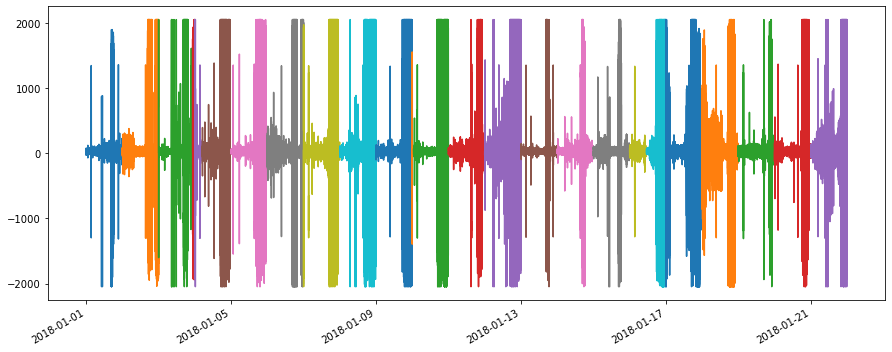

In [55]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot()
for i in range(len(st_long)):
    ax.plot(st_long[i].times("matplotlib"), st_long[i].data, "C{}".format(i))
ax.xaxis_date()
fig.autofmt_xdate()
plt.show()

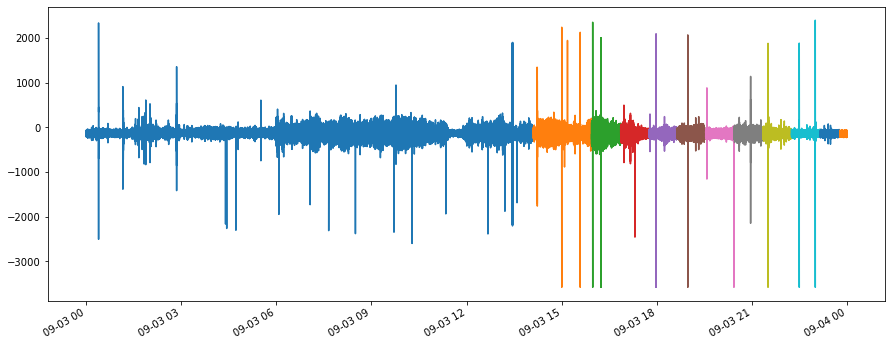

In [12]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot()
for i in range(len(st_long)):
    ax.plot(st_long[i].times("matplotlib"), st_long[i].data, "C{}".format(i))
ax.xaxis_date()
fig.autofmt_xdate()
plt.show()

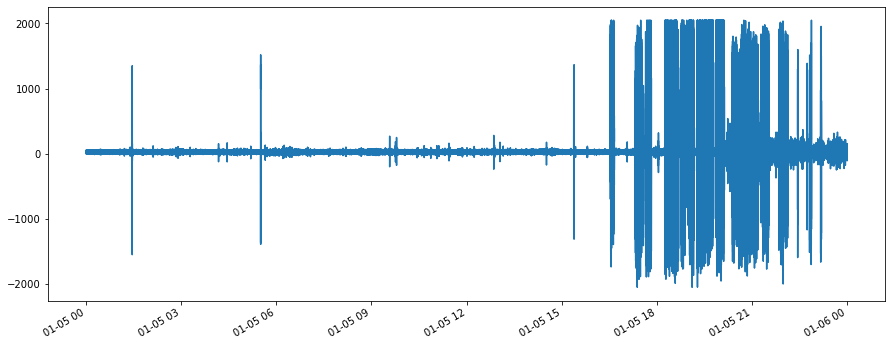

In [12]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot()
for i in range(len(st_r)):
    ax.plot(st_r[i].times("matplotlib"), st_r[i].data, "C{}".format(i))
ax.xaxis_date()
fig.autofmt_xdate()
plt.show()

Text(0.04, 0.5, 'counts')

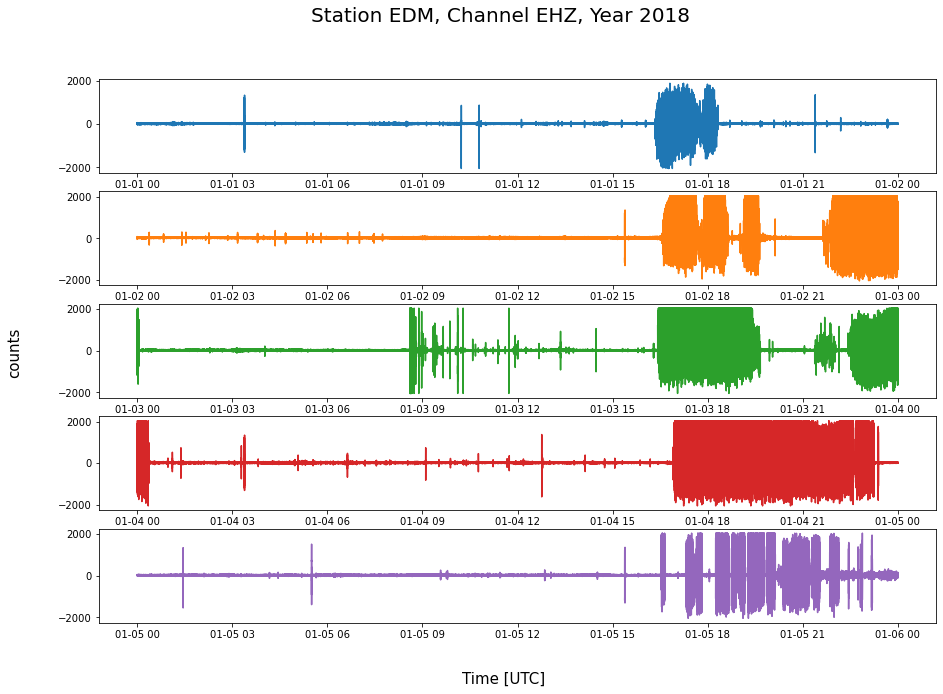

In [27]:
net = 'UW'
sta = 'EDM'
cha = 'EHZ'
year = 2018
jdays = range(1,6)

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 10), sharex=True)
fig, ax = plt.subplots(len(jdays), figsize=(15, 10))

for i,jday in enumerate(jdays):
    st_r = read_stream(net, sta, cha, year, jday)
    st_m = st_r.copy().merge()
    ax[i].plot(st_m[0].times("matplotlib"), st_m[0].data, "C{}".format(i))
    ax[i].xaxis_date()
fig.suptitle('Station EDM, Channel EHZ, Year 2018 ', fontsize=20)
fig.text(0.5, 0.04, 'Time [UTC]', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'counts', va='center', rotation='vertical', fontsize=15)
#fig.tight_layout()

Text(0.04, 0.5, 'counts')

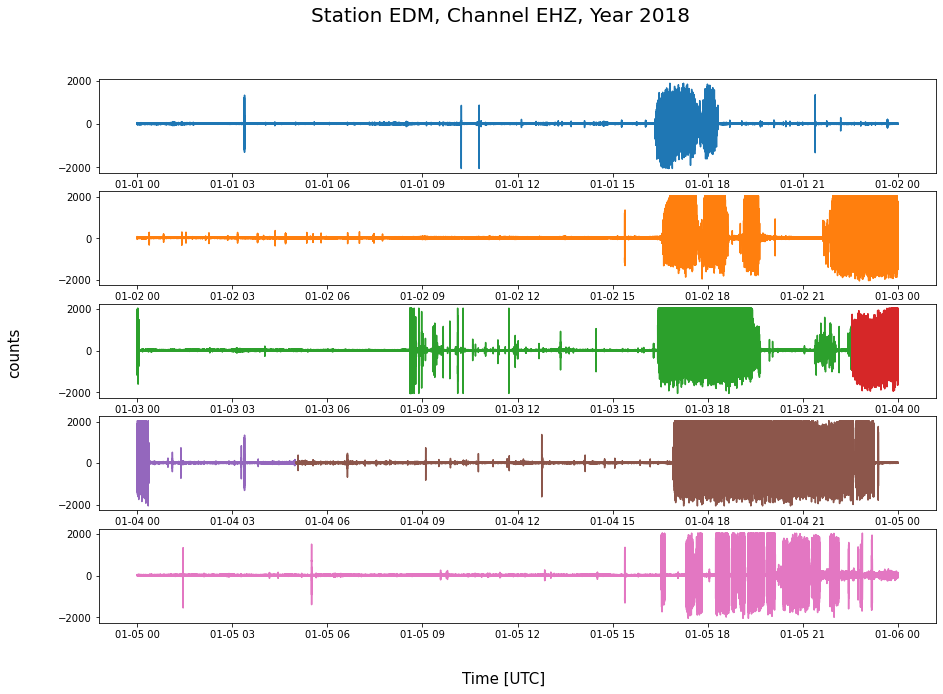

In [30]:
net = 'UW'
sta = 'EDM'
cha = 'EHZ'
year = 2018
jdays = range(1,6)

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 10), sharex=True)
fig, ax = plt.subplots(len(jdays), figsize=(15, 10))

i = 0
for j,jday in enumerate(jdays):
    st_r = read_stream(net, sta, cha, year, jday)
    for trx in range(len(st_r)):
        ax[j].plot(st_r[trx].times("matplotlib"), st_r[trx].data, "C{}".format(i))
        ax[j].xaxis_date()
        i += 1
fig.suptitle('Station EDM, Channel EHZ, Year 2018 ', fontsize=20)
fig.text(0.5, 0.04, 'Time [UTC]', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'counts', va='center', rotation='vertical', fontsize=15)
#fig.tight_layout()

In [345]:
[datetime.datetime.fromtimestamp(nn).strftime("%H:%M") for nn in nanos]

['16:00',
 '18:00',
 '20:00',
 '22:00',
 '00:00',
 '02:00',
 '04:00',
 '06:00',
 '08:00',
 '10:00',
 '12:00',
 '14:00']

In [355]:
print(rms_ar.shape,len(start_t_list))

(21, 131) 131


In [13]:
st_r[0].times("matplotlib")

array([17536.        , 17536.00000012, 17536.00000023, ...,
       17536.9999934 , 17536.99999352, 17536.99999363])